# ***Imports***

In [ ]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[Практика 5](https://colab.research.google.com/drive/1hYmBn7v1z7FKFmNeIOo6TrEZfi5QpvX-?usp=sharing)

# ***Data***

In [ ]:
# Створи об'єкт, який міститиме в собі наш датасет
housing_data = pd.read_csv('/content/drive/MyDrive/House_Rent_Prediction.csv')

In [ ]:
missing_data = housing_data[housing_data.isna().any(axis=1)]
print(missing_data)

Empty DataFrame
Columns: [Posted On, BHK, Rent, Size, Floor, Area Type, Area Locality, City, Furnishing Status, Tenant Preferred, Bathroom, Point of Contact]
Index: []


In [ ]:
housing_data.isna().mean()

,0
Posted On,0.0
BHK,0.0
Rent,0.0
Size,0.0
Floor,0.0
Area Type,0.0
Area Locality,0.0
City,0.0
Furnishing Status,0.0
Tenant Preferred,0.0


**Нема пропусків і бінарних значень**

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
for col in housing_data.select_dtypes(include='object').columns:
    if col == 'Floor':
        continue
    print(f'{col} ({housing_data[col].nunique()}): {housing_data[col].unique()}')

Posted On (81): ['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23'
 '2022-05-14' '2022-05-05' '2022-06-01' '2022-05-17' '2022-06-09'
 '2022-07-02' '2022-06-14' '2022-06-15' '2022-05-28' '2022-05-22'
 '2022-06-18' '2022-06-25' '2022-06-22' '2022-05-21' '2022-06-26'
 '2022-06-16' '2022-06-29' '2022-05-10' '2022-05-12' '2022-06-03'
 '2022-05-31' '2022-06-10' '2022-06-24' '2022-04-30' '2022-05-27'
 '2022-06-06' '2022-05-20' '2022-05-26' '2022-07-03' '2022-04-23'
 '2022-06-19' '2022-07-06' '2022-06-04' '2022-05-30' '2022-06-08'
 '2022-05-03' '2022-05-07' '2022-06-27' '2022-05-15' '2022-04-28'
 '2022-06-28' '2022-06-23' '2022-06-13' '2022-05-04' '2022-04-25'
 '2022-05-06' '2022-06-30' '2022-07-01' '2022-06-17' '2022-06-11'
 '2022-05-11' '2022-06-12' '2022-06-05' '2022-05-25' '2022-05-24'
 '2022-05-19' '2022-04-24' '2022-04-27' '2022-05-08' '2022-04-26'
 '2022-06-02' '2022-05-29' '2022-07-07' '2022-07-08' '2022-0

In [ ]:
housing_data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
housing_data['Furnishing Status'] = housing_data['Furnishing Status'].replace({'Unfurnished': 0, 'Semi-Furnished': 1/2, 'Furnished': 1})

<ipython-input-608-ab6d0016d295>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_data['Furnishing Status'] = housing_data['Furnishing Status'].replace({'Unfurnished': 0, 'Semi-Furnished': 1/2, 'Furnished': 1})


In [ ]:
housing_data['Area Type'].value_counts()

,count
Area Type,
Super Area,2446
Carpet Area,2298
Built Area,2


In [ ]:
housing_data = pd.get_dummies(housing_data, columns=['Area Type', 'City', 'Point of Contact'], drop_first=True)

In [ ]:
for old, new in {'Ground': '0', 'Upper': '-1', 'Lower': '-2'}.items():
    housing_data.Floor = housing_data.Floor.str.replace(old, new)
housing_data['Max Floor'] = housing_data.Floor.apply(lambda x: int(x.split(' ')[-1]))
housing_data['Floor'] = housing_data.Floor.apply(lambda x: int(x.split(' ')[0]))

In [ ]:
housing_data = housing_data.drop(columns=['Posted On', 'Area Locality', 'Tenant Preferred'])

In [ ]:
y = housing_data.Rent

X = housing_data.drop(columns=['Rent'])

In [ ]:
housing_data

,BHK,Rent,Size,Floor,Furnishing Status,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Max Floor
0,2,10000,1100,0,0.0,2,False,True,False,False,False,True,False,False,True,2
1,2,20000,800,1,0.5,1,False,True,False,False,False,True,False,False,True,3
2,2,17000,1000,1,0.5,1,False,True,False,False,False,True,False,False,True,3
3,2,10000,800,1,0.0,1,False,True,False,False,False,True,False,False,True,2
4,2,7500,850,1,0.0,1,True,False,False,False,False,True,False,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,0.5,2,True,False,False,False,True,False,False,False,True,5
4742,3,29000,2000,1,0.5,3,False,True,False,False,True,False,False,False,True,4
4743,3,35000,1750,3,0.5,3,True,False,False,False,True,False,False,False,False,5
4744,3,45000,1500,23,0.5,2,True,False,False,False,True,False,False,False,False,34


In [ ]:
housing_data.describe()

,BHK,Rent,Size,Floor,Furnishing Status,Bathroom,Max Floor
count,4746.000000,4.746000e+03,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,3.436157,0.380426,1.965866,6.968605
std,0.832256,7.810641e+04,634.202328,5.773950,0.342276,0.884532,9.467245
min,1.000000,1.200000e+03,10.000000,-2.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000e+04,550.000000,1.000000,0.000000,1.000000,2.000000
50%,2.000000,1.600000e+04,850.000000,2.000000,0.500000,2.000000,4.000000
75%,3.000000,3.300000e+04,1200.000000,3.000000,0.500000,2.000000,6.000000
max,6.000000,3.500000e+06,8000.000000,76.000000,1.000000,10.000000,89.000000


In [ ]:
housing_data.var()

,0
BHK,6.926499e-01
Rent,6.100612e+09
Size,4.022126e+05
Floor,3.333849e+01
Furnishing Status,1.171531e-01
Bathroom,7.823963e-01
Area Type_Carpet Area,2.498029e-01
Area Type_Super Area,2.498161e-01
City_Chennai,1.525240e-01
City_Delhi,1.112491e-01


**Кореляція**

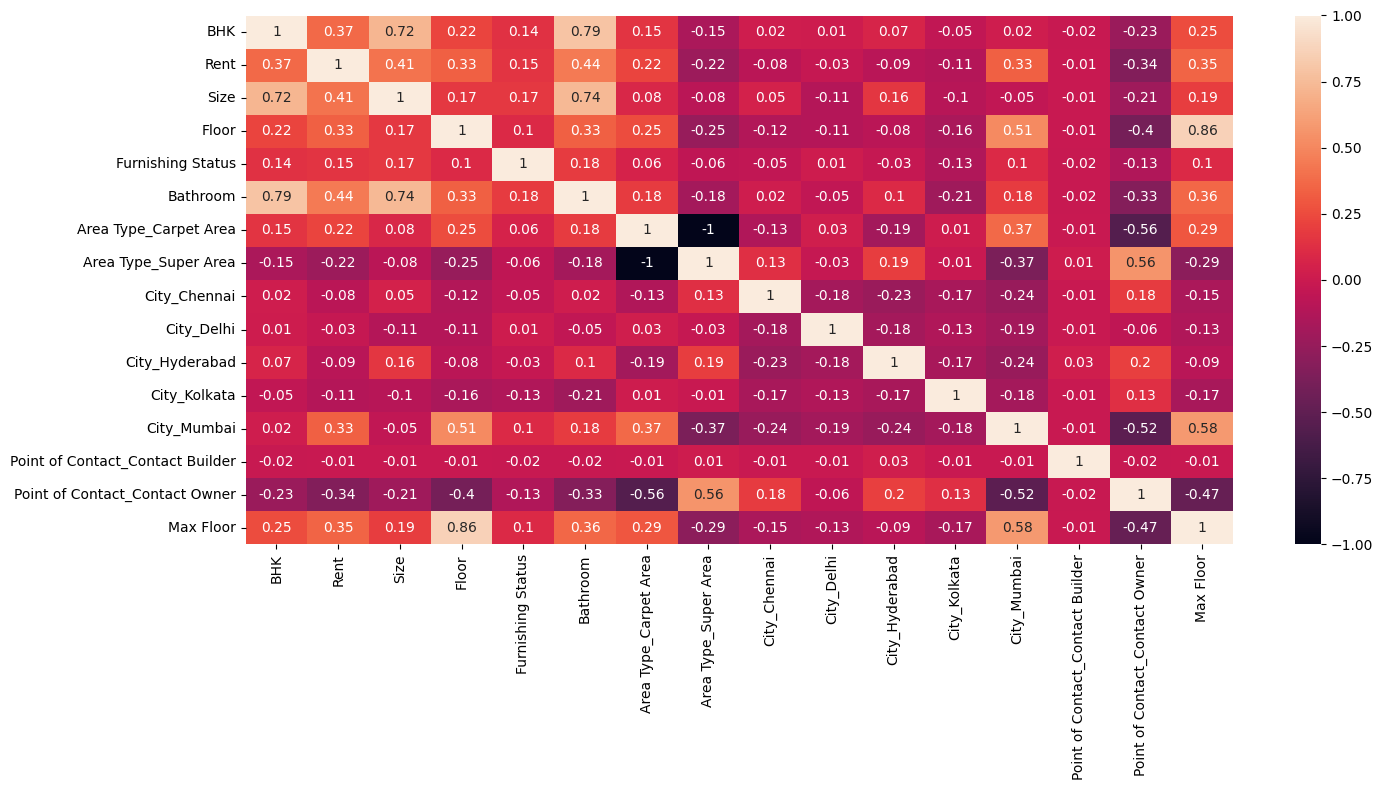

In [ ]:
fig, ax = plt.subplots(figsize=(15,  8))
sns.heatmap(housing_data.corr().round(2), annot=True, ax=ax)
fig.tight_layout()

In [ ]:
housing_data.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Furnishing Status', 'Bathroom',
       'Area Type_Carpet Area', 'Area Type_Super Area', 'City_Chennai',
       'City_Delhi', 'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'Point of Contact_Contact Builder', 'Point of Contact_Contact Owner',
       'Max Floor'],
      dtype='object')

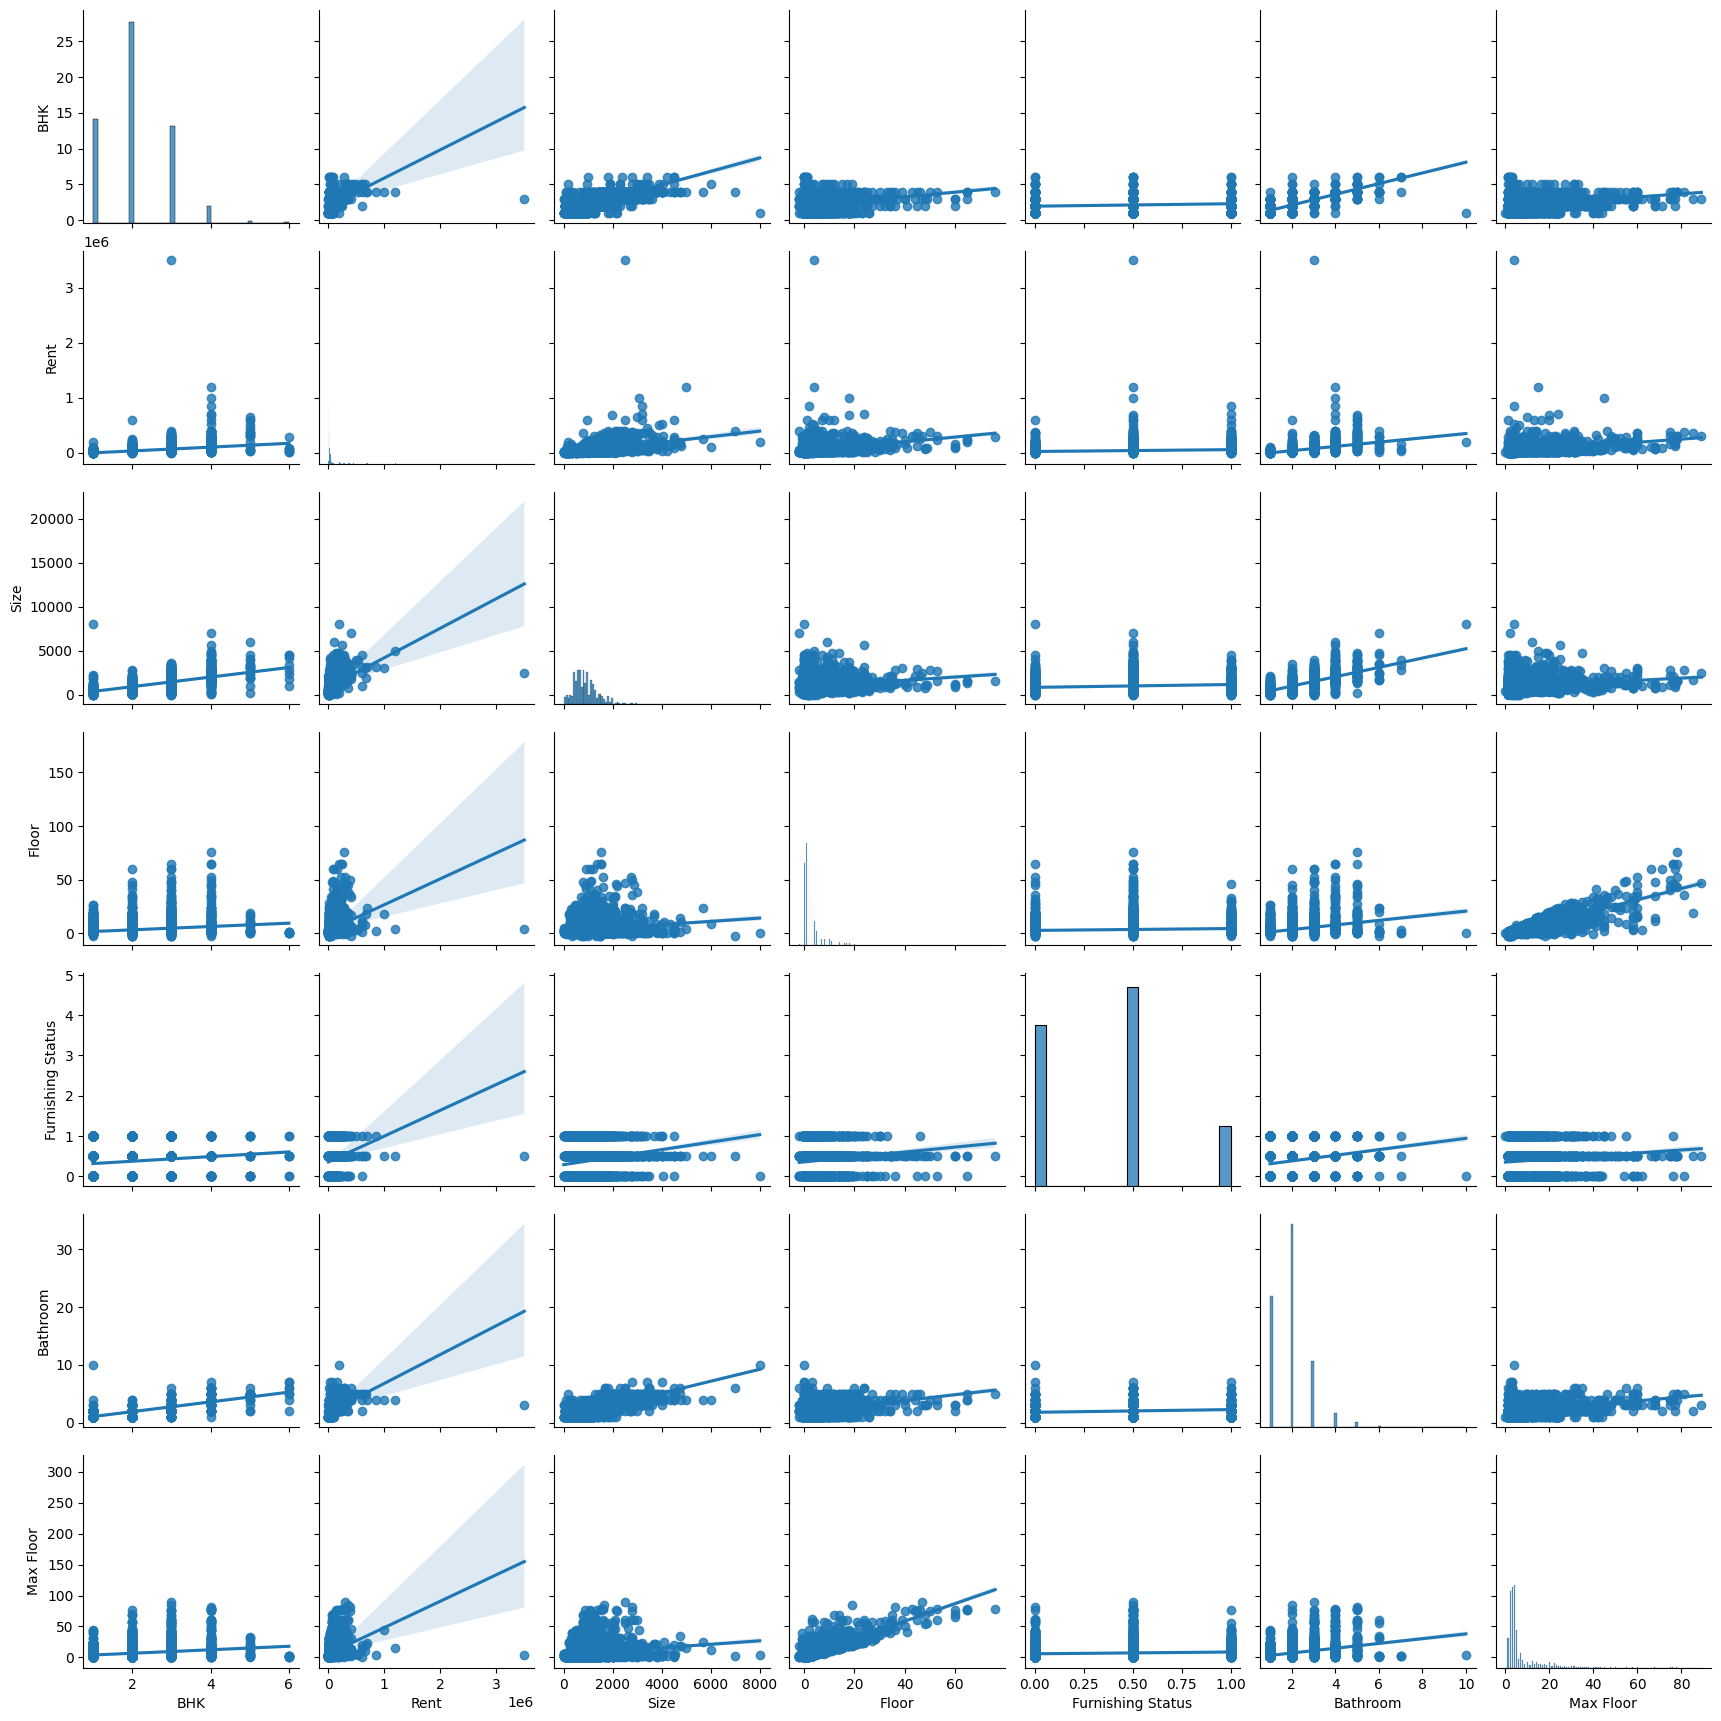

In [ ]:
sns.pairplot(housing_data[['BHK', 'Rent', 'Size', 'Floor', 'Furnishing Status', 'Bathroom', 'Max Floor']], kind='reg')

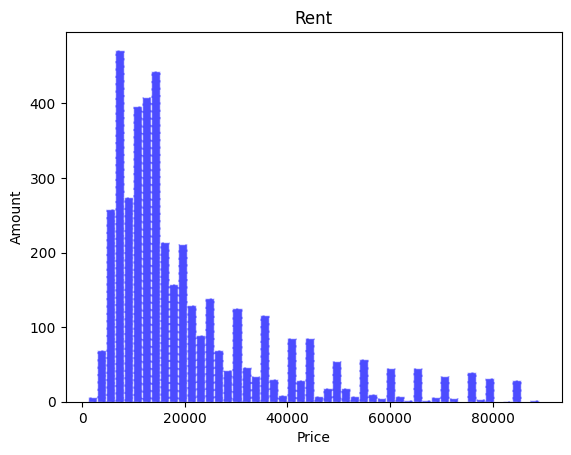

In [ ]:
data_rent = housing_data['Rent'][housing_data['Rent']<90000]
plt.hist(data_rent, bins = 50, alpha = 0.7, color ='blue', edgecolor ='white', linestyle ='dashed')
plt.title('Rent')
plt.xlabel('Price')
plt.ylabel('Amount')
plt.show()

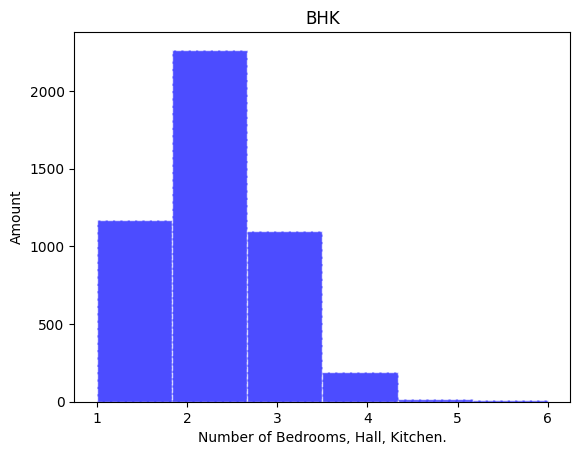

In [ ]:
data_rent = housing_data['BHK']
plt.hist(data_rent, bins = 6, alpha = 0.7, color ='blue', edgecolor ='white', linestyle ='dashed')
plt.title('BHK')
plt.xlabel('Number of Bedrooms, Hall, Kitchen.')
plt.ylabel('Amount')
plt.show()

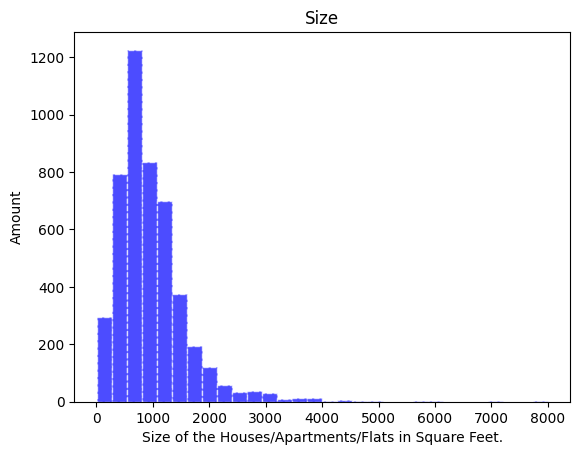

In [ ]:
data_rent = housing_data['Size']
plt.hist(data_rent, bins = 30, alpha = 0.7, color ='blue', edgecolor ='white', linestyle ='dashed')
plt.title('Size')
plt.xlabel('Size of the Houses/Apartments/Flats in Square Feet.')
plt.ylabel('Amount')
plt.show()

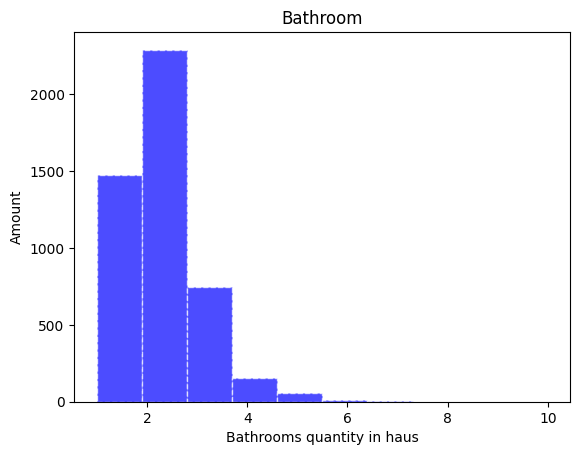

In [ ]:
data_rent = housing_data['Bathroom']
plt.hist(data_rent, bins = 10, alpha = 0.7, color ='blue', edgecolor ='white', linestyle ='dashed')
plt.title('Bathroom')
plt.xlabel('Bathrooms quantity in haus')
plt.ylabel('Amount')
plt.show()

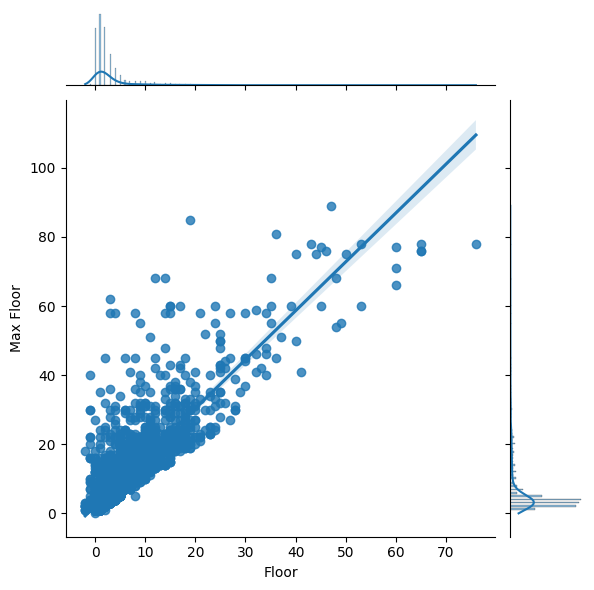

In [ ]:
sns.jointplot(housing_data, x='Floor', y='Max Floor', kind='reg')

In [ ]:
y.describe()

,Rent
count,4.746000e+03
mean,3.499345e+04
std,7.810641e+04
min,1.200000e+03
25%,1.000000e+04
50%,1.600000e+04
75%,3.300000e+04
max,3.500000e+06


In [ ]:
X

,BHK,Size,Floor,Furnishing Status,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Max Floor
0,2,1100,0,0.0,2,False,True,False,False,False,True,False,False,True,2
1,2,800,1,0.5,1,False,True,False,False,False,True,False,False,True,3
2,2,1000,1,0.5,1,False,True,False,False,False,True,False,False,True,3
3,2,800,1,0.0,1,False,True,False,False,False,True,False,False,True,2
4,2,850,1,0.0,1,True,False,False,False,False,True,False,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,3,0.5,2,True,False,False,False,True,False,False,False,True,5
4742,3,2000,1,0.5,3,False,True,False,False,True,False,False,False,True,4
4743,3,1750,3,0.5,3,True,False,False,False,True,False,False,False,False,5
4744,3,1500,23,0.5,2,True,False,False,False,True,False,False,False,False,34


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# X_train

# y_train

# X_test

# y_test

In [ ]:
X_train.head(10)

,BHK,Size,Floor,Furnishing Status,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Max Floor
465,2,750,2,0.0,1,False,True,False,False,False,True,False,False,True,2
4086,2,1200,1,0.5,2,False,True,False,False,True,False,False,False,True,6
4034,3,1955,1,0.0,3,False,True,False,False,True,False,False,False,False,19
1558,2,1200,1,0.5,2,False,True,False,False,False,False,False,False,True,2
4260,2,800,2,0.5,2,False,True,False,False,True,False,False,False,True,2
144,2,1000,0,0.5,1,False,True,False,False,False,True,False,False,True,2
4338,3,1550,1,0.0,3,True,False,False,False,True,False,False,False,True,5
3329,2,1113,2,0.5,2,False,True,True,False,False,False,False,False,True,4
2251,3,1875,3,0.5,2,False,True,False,False,False,False,False,False,True,3
4621,2,1100,0,0.0,2,False,True,False,False,True,False,False,False,True,5


In [ ]:
X_test.head(10)

,BHK,Size,Floor,Furnishing Status,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Max Floor
1566,2,1100,2,0.0,2,False,True,False,False,False,False,False,False,True,4
3159,2,800,2,1.0,2,False,True,True,False,False,False,False,False,True,3
538,2,518,5,0.5,2,True,False,False,False,False,False,True,False,True,12
2630,3,1500,1,0.0,3,True,False,False,True,False,False,False,False,True,1
4418,3,2235,0,0.0,5,True,False,False,False,True,False,False,False,False,10
4679,2,1050,3,0.5,2,True,False,False,False,True,False,False,False,False,3
1181,2,625,9,1.0,2,True,False,False,False,False,False,True,False,False,18
1957,2,700,2,0.5,2,False,True,False,False,False,False,False,False,True,6
1344,4,2500,5,1.0,4,True,False,False,False,False,False,True,False,False,12
3410,2,650,2,0.5,2,False,True,True,False,False,False,False,False,True,3


# ***DecisionTreeRegressor***

In [ ]:
# Визнач модуль. Уточни число для random_statе, щоб гарантувати однакові результати кожного разу, коли проганятимеш код
housing_model_decision = DecisionTreeRegressor(random_state=1)


# Піджени модель!
housing_model_decision.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
pred_decision = housing_model_decision.predict(X_test)

In [ ]:
y_test.head(10)

,Rent
1566,16000
3159,12000
538,28000
2630,8000
4418,46000
4679,17000
1181,57000
1957,9500
1344,400000
3410,15000


In [ ]:
print("Ціна з документу --> Прогнозована ціна")
for pred, real in zip(housing_model_decision.predict(X_test.head(10)), list(y_test.head(10))):
    print(f'{real}\t --> \t{round(pred, 3)} \t(Похибка: {abs(real-pred)})')

Ціна з документу --> Прогнозована ціна
16000	 --> 	23000.0 	(Похибка: 7000.0)
12000	 --> 	14000.0 	(Похибка: 2000.0)
28000	 --> 	20000.0 	(Похибка: 8000.0)
8000	 --> 	60000.0 	(Похибка: 52000.0)
46000	 --> 	55000.0 	(Похибка: 9000.0)
17000	 --> 	16000.0 	(Похибка: 1000.0)
57000	 --> 	48000.0 	(Похибка: 9000.0)
9500	 --> 	12000.0 	(Похибка: 2500.0)
400000	 --> 	400000.0 	(Похибка: 0.0)
15000	 --> 	16000.0 	(Похибка: 1000.0)


In [ ]:
mae = mean_absolute_error(y_test, pred_decision)
mse = mean_squared_error(y_test, pred_decision)
evs = explained_variance_score(y_test, pred_decision)
r2 = r2_score(y_test, pred_decision)

print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"EVS:  {evs:.4f}")
print(f"R²:   {r2:.4f}")

MAE:  13310.1204
MSE:  2274707393.6228
EVS:  0.2843
R²:   0.2830


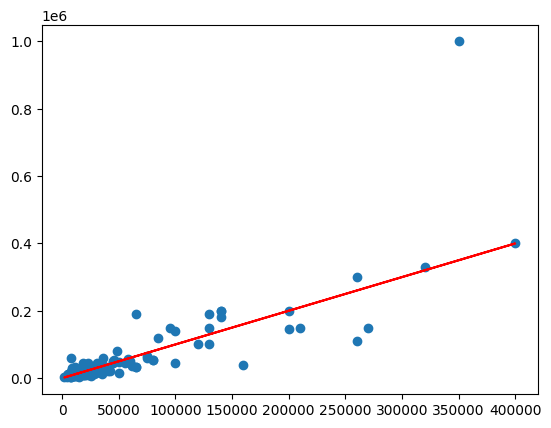

In [ ]:
plt.scatter(y_test, pred_decision)
plt.plot(y_test, y_test, color='red', label='Line of Best Fit')

# ***LinearRegression***

In [ ]:
# Визнач модуль. Уточни число для random_statе, щоб гарантувати однакові результати кожного разу, коли проганятимеш код
housing_model_linear = LinearRegression().fit(X_train, y_train)


# Піджени модель!
housing_model_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_linear = housing_model_linear.predict(X_test)

In [ ]:
y_test.head(10)

,Rent
1566,16000
3159,12000
538,28000
2630,8000
4418,46000
4679,17000
1181,57000
1957,9500
1344,400000
3410,15000


In [ ]:
print("Ціна з документу --> Прогнозована ціна")
for pred, real in zip(housing_model_linear.predict(X_test.head(10)), list(y_test.head(10))):
    print(f'{real}\t --> \t{round(pred, 3)} \t(Похибка: {abs(round(real-pred, 3))})')

Ціна з документу --> Прогнозована ціна
16000	 --> 	26369.152 	(Похибка: 10369.152)
12000	 --> 	13477.941 	(Похибка: 1477.941)
28000	 --> 	57912.145 	(Похибка: 29912.145)
8000	 --> 	65245.949 	(Похибка: 57245.949)
46000	 --> 	93293.033 	(Похибка: 47293.033)
17000	 --> 	21360.664 	(Похибка: 4360.664)
57000	 --> 	75992.704 	(Похибка: 18992.704)
9500	 --> 	13752.298 	(Похибка: 4252.298)
400000	 --> 	167350.197 	(Похибка: 232649.803)
15000	 --> 	4620.989 	(Похибка: 10379.011)


In [ ]:
mae = mean_absolute_error(y_test, pred_linear)
mse = mean_squared_error(y_test, pred_linear)
evs = explained_variance_score(y_test, pred_linear)
r2 = r2_score(y_test, pred_linear)

print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"EVS:  {evs:.4f}")
print(f"R²:   {r2:.4f}")

MAE:  22260.2431
MSE:  1138301415.5463
EVS:  0.6412
R²:   0.6412


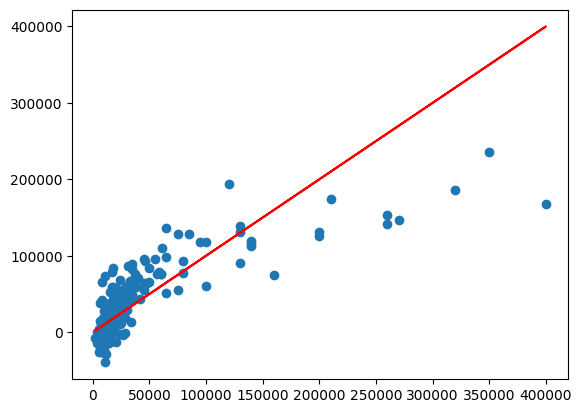

In [ ]:
plt.scatter(y_test, pred_linear)
plt.plot(y_test, y_test, color='red', label='Line of Best Fit')